# Introduction to OpenCV - Exercises
## Computer Vision and Image Processing - Lab Session 2
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it, Riccardo Spezialetti, riccardo.spezialetti@unibo.it

## Exercise 1: Invert Grayscale Image

####  Compute the *“negative”* of a  grayscale image (range of each pixel between [0 255]).  For each pixel having intensity I, modify its the value: 255 - I. Download *"grayscale.jpg"* and test the program on it.

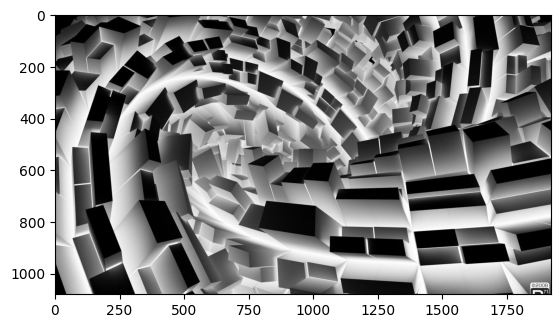

In [4]:
%matplotlib inline
# Write here your solution
# Import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read image
grayscale_img = cv2.imread("grayscale.jpg", cv2.IMREAD_GRAYSCALE)
# Invert image
negative_grayscale_img = 255 - grayscale_img.copy()
# Display Image
plt.imshow(negative_grayscale_img, cmap="gray", vmin=0, vmax=255)
plt.show()

## Exercise 2: Invert RGB Image

#### Same as before, but in this case we want to compute the negative of a color image. The image has 3 channels, representing the 3 RGB values, the intensity of each channel ranges between [0 255]. For each image pixel, we need to substitute the (B,G,R) triplet with its «inverse» *(255-B, 255-G, 255-R)*.  Download *"avengers.png"*and test the program on it.

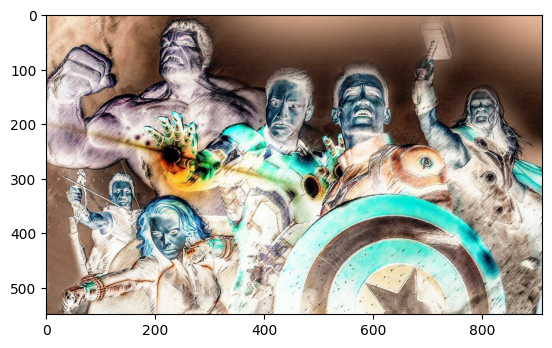

In [6]:
%matplotlib inline
# Write here your solution

# Read image
avengers_img = cv2.imread("avengers.png")
avengers_rgb = cv2.cvtColor(avengers_img, cv2.COLOR_BGR2RGB)
# Invert image
inverted_avengers = 255 - avengers_rgb.copy()

# Display Image
plt.imshow(inverted_avengers)
plt.show()

## Exercise 3: Differences between Images

#### 1: Compute the pixel-wise difference between two pictures : Image1 and Image2. Compute an output image where each pixel of coordinates (x,y) contains the absolute difference of the corresponding pixels on Image1 and Image2: Out(x,y) = abs(Image1(x,y) – Image2(x,y)). 
#### 2: Find all pixels with a mean difference (across R,G,B channels) higher than 0 and create a copy of Image1 obscuring (with value 0) those pixels. Display that image.
#### 3: Save the new image on disk and check the result. 
#### Test the exercise on Image 1:*"differences1.png"* and Image 2: *"differences2.png"*.

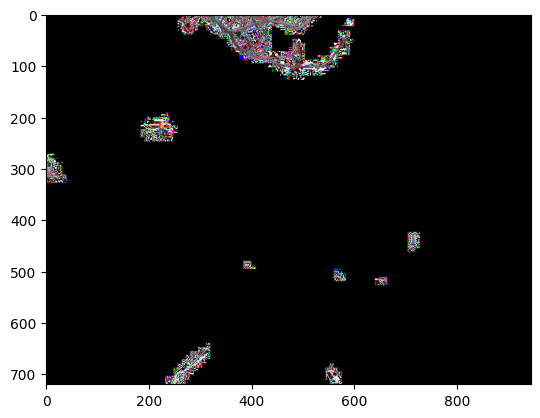

In [10]:
%matplotlib inline
# Write here your solution

# Read images
img_1 = cv2.imread("Differences/differences1.png")
img_2 = cv2.imread("Differences/differences2.png")

# Perform Difference
difference_img = np.abs(img_1-img_2)
difference_rgb = cv2.cvtColor(difference_img, cv2.COLOR_BGR2RGB)

# Display Image
plt.imshow(difference_rgb)
plt.show()

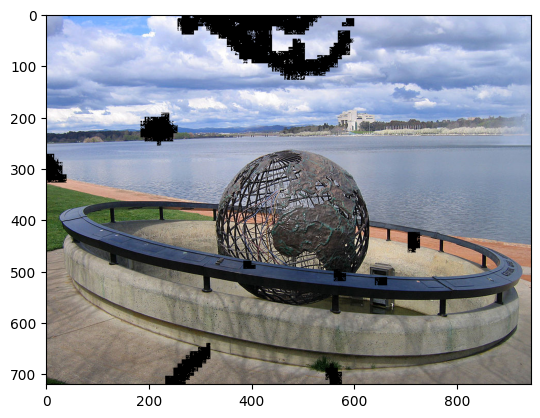

In [16]:
# Compute mean difference along last axis and mask image based on threshold
mask_avg_difference_positive = (np.mean(img_1-img_2, axis=-1) > 0)

img_1_masked = img_1.copy()
img_1_masked[mask_avg_difference_positive] = 0

# Display Image
plt.imshow(cv2.cvtColor(img_1_masked, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
# Save image on disk
cv2.imwrite("Differences/differences_masked.png", img_1_masked)

True

## Exercise 4 [OPTIONAL]: Classify 7-Segments Display Digits

#### Classify a digits of the 7-segment display. 

<img src="7segments.png" width="128" height="256">

#### In a 7-segment display each segment can be ON or OFF. In a binary image we identify 255 (white) as ON and 0 (black) as OFF. The order of the 7-segments is depicted in the image above. To understand the image location of the segments refer to sample images (1.png, ..., 9.png).

#### The combination of ON and OFF segments allows the display to show all possible digits from 0 to 9. A segment is defined ON if there are only white pixels (255) in that portion of an image. In test images each segment have a width of 20 pixels and an height of 128 pixels. Given a 256x128 digit image classify the correct number.

#### It is enough that the algorithm works on example images (a general solution is not required).

#### Test the program on digits images (1.png,  ..., 9.png). 

#### Tips (Only if you need help): 
* Identify the correct location (rows, columns range) for each segment based on example images (1.png, 2.png, etc). 
* Understand which segment is ON and OFF and save the status of each segment.
* Based on which segment is active look for the right digit.

In [18]:
%matplotlib inline
# Write here your solution

# Dictionary of ON segments for each possible digit.
# The order follows the scheme of the image above.
# For instance, digit 1 have only the segments 2 and 5 ON (1) while the others OFF (0).
SEGMENTS_DIGITS = {
(1, 1, 1, 0, 1, 1, 1): 0,
(0, 0, 1, 0, 0, 1, 0): 1,
(1, 0, 1, 1, 1, 0, 1): 2,
(1, 0, 1, 1, 0, 1, 1): 3,
(0, 1, 1, 1, 0, 1, 0): 4,
(1, 1, 0, 1, 0, 1, 1): 5,
(1, 1, 0, 1, 1, 1, 1): 6,
(1, 0, 1, 0, 0, 1, 0): 7,
(1, 1, 1, 1, 1, 1, 1): 8,
(1, 1, 1, 1, 0, 1, 1): 9
}

SEGMENTS = {
    0: [0, 20, 0, 128],
    1: [0, 128, 0, 20],
    2: [0, 128, -20, 128],
    3: [118, 138, 0, 128],
    4: [128, 256, 0, 20],
    5: [128, 256, -20, 128],
    6: [-20, 256, 0, 128]
}


# Find active elements
def is_active(img, element):
    segment = SEGMENTS[element]
    if np.mean(img[segment[0]:segment[1], segment[2]:segment[3]]) == 255:
        return 1
    else:
        return 0

def get_active_segments(img):
    active_segments = [0,0,0,0,0,0,0]
    for i in range(len(active_segments)):
        if is_active(img, i):
            active_segments[i] += 1
    
    return active_segments

def test(get_active_segments_function):
    for i in range(10):
        image = cv2.imread('Digits/' + str(i) + '.png', cv2.IMREAD_GRAYSCALE)
        if tuple(get_active_segments_function(image)) in SEGMENTS_DIGITS:
            if SEGMENTS_DIGITS[tuple(get_active_segments_function(image))] != i:
                print('Failed to classify digit', i)
                return False

        else:
            print('Digit {} segments give a combination that is not accepted'.format(i))
            return False
            
    print('---\nTesting over all digits ... \nThe solution is correct.\n---')

# Get the corresponding digit from the dictionary

# Results
test(get_active_segments)

---
Testing over all digits ... 
The solution is correct.
---
